In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names

In [2]:
# get the col reference table
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
# df_ref.head()

In [3]:
# get the data frame giving the list of IDEHRs who have passed
get_file_names(['IDEHR', 'EHRType', 'IDDecesso'], df_ref)

['wH_DirectTable_Decesso', 'wH_DirectTable_C_Decesso']

In [4]:
# get the data frame giving the list of IDEHRs with the start date of hospitalization
get_file_names(['IDEHR', 'EHRType', 'TimeStamp_Insert'], df_ref)

['wH_DirectTable_C_Informazioni_SS',
 'wH_DirectTable_C_ANAMNESI_MED',
 'wH_DirectTable_ASSOC_ON_FUNEBRI',
 'wH_DirectTable_CONSULENZA_COVID19',
 'wH_DirectTable__S_VMD_FLUSSI_',
 'wH_DirectTable_Telefonata',
 'wH_DirectTable_C_PI',
 'wH_DirectTable_C_Dati_Integrativi_SDO',
 'wH_DirectTable_C__S_VMD_FLUSSI_',
 'wH_DirectTable_BCP_generale',
 'wH_DirectTable_C_VISITA_FKT_VIDAS',
 'wH_DirectTable_XX_VISITA_INF_VIDAS',
 'wH_DirectTable_Informazioni_SS',
 'wH_DirectTable_C_Valutazione_famiglia',
 'wH_DirectTable_C_ASSOC_ON_FUNEBRI',
 'wH_DirectTable_C_TERAPIE_OUTPAT_VIDAS',
 'wH_DirectTable_Dati_Integrativi_SDO',
 'wH_Conf_ModuleUpdateOperation',
 'wH_DirectTable_FOLLW_UP_ASS',
 'wH_DirectTable_Decesso',
 'wH_DirectTable_C_COLLOQUIO_OSS',
 'wH_DirectTable_TERAPIE_OUTPAT_VIDAS',
 'wH_DirectTable_ACCETTAZIONE_PERCORS',
 'wH_DirectTable_VISITA_FKT_VIDAS',
 'wH_DirectTable_C_VISITA_INF_VIDAS',
 'wH_DirectTable_C_Pers_Riferimento',
 'wH_DirectTable_GESTIONE_AUSILI',
 'wH_DirectTable_ANAMNESI_SO

In [5]:
# get the data frame giving the list of IDEHRs with the diagnosis
get_file_names(['IDEHR', 'EHRType', 'IDDIAGNOSI_ICD'], df_ref)

['wH_DirectTable_DIAGNOSI_ICD', 'wH_DirectTable_C_DIAGNOSI_ICD']

In [6]:
# data frame with deathID
df_death = pd.read_csv('./vidas_data/wH_DirectTable_Decesso.csv', parse_dates=['Data'])
df_death = df_death[['IDEHR', 'Data', 'EHRType']].drop_duplicates(subset=['IDEHR', 'EHRType'], keep='first')
print(df_death.shape)
df_death.head()

(6056, 3)


,IDEHR,Data,EHRType
0,4,2015-01-09 16:15:00,EHR
1,1022,2015-01-11 00:15:00,EHR
2,16,2015-01-15 01:45:00,EHR
3,1025,2015-01-15 06:44:00,EHR
4,6,2015-01-20 14:50:00,EHR


In [7]:
# check NaNs
df_death.isna().sum()

IDEHR       0
Data       54
EHRType     0
dtype: int64

In [8]:
# data frame with start of hospitalization
# df_soh = pd.read_csv('./vidas_data/wH_DigitalSign_DigSigDoc.csv', parse_dates=['TimeStamp_Insert'])
# using the earliest timestamp for an IDEHR+EHRType from all tables
df_soh = pd.read_csv('./vidas_data/start_time.csv', parse_dates=['TimeStamp_Insert'])
print(df_soh.shape)
df_soh = df_soh[['IDEHR', 'EHRType', 'TimeStamp_Insert']].drop_duplicates(subset=['IDEHR', 'EHRType'], keep='first')
print(df_soh.shape)
df_soh.head()

(20671, 3)
(20671, 3)


,IDEHR,EHRType,TimeStamp_Insert
0,10,AMB,2015-01-13 15:04:16.330
1,13,AMB,2015-01-13 15:07:17.303
2,19,AMB,2015-01-13 11:48:38.683
3,22,AMB,2015-01-05 11:53:12.503
4,25,AMB,2015-01-13 11:51:36.037


In [9]:
# check NaNs
df_soh.isna().sum()

IDEHR               0
EHRType             0
TimeStamp_Insert    0
dtype: int64

In [10]:
# data frame with diagnosis
df_diag = pd.read_csv('./vidas_data/wH_DirectTable_DIAGNOSI_ICD.csv')
df_diag = df_diag[['IDEHR', 'I_ICD', 'EHRType']].drop_duplicates(subset=['IDEHR', 'EHRType'], keep='first').dropna()
print(df_diag.shape)
df_diag.head()

(8388, 3)


C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (23,24,42,43,44,62,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IDEHR,I_ICD,EHRType
0,3339,1629 - Tumori maligni del bronco o polmone - ...,AMB
2,3170,1749 - Tumori maligni della mammella (della do...,AMB
3,2885,1428 - Tumori maligni di altre ghiandole saliv...,AMB
4,3017,1749 - Tumori maligni della mammella (della do...,AMB
5,3297,1629 - Tumori maligni del bronco o polmone - ...,AMB


In [11]:
# check NaNs
df_diag.isna().sum()

IDEHR      0
I_ICD      0
EHRType    0
dtype: int64

In [12]:
df_diag = df_diag.dropna()
print(df_diag.shape)
df_diag.isna().sum()

(8388, 3)


IDEHR      0
I_ICD      0
EHRType    0
dtype: int64

In [13]:
# df_diag.diagnosi.value_counts()

In [14]:
# generate date span in df_death for IDEHRs 
df_ds = pd.read_csv('./vidas_data/wH_DirectTable_Decesso.csv', parse_dates=['Data'])
df_ds = df_ds[['IDEHR', 'Data', 'EHRType']].sort_values(by=['IDEHR', 'Data'], ascending=[True, True]).reset_index(drop=True)
df_ds.head()

,IDEHR,Data,EHRType
0,2,2015-02-22 03:00:00,EHR
1,4,2015-01-09 16:15:00,EHR
2,6,2015-01-20 14:50:00,EHR
3,7,2015-03-12 14:45:00,EHR
4,8,2015-02-25 06:12:00,EHR


In [15]:
df_ds1 = df_ds.drop_duplicates(['IDEHR', 'EHRType'], keep='first')
df_ds2 = df_ds.drop_duplicates(['IDEHR', 'EHRType'], keep='last')
date_span = pd.to_timedelta(df_ds2.Data - df_ds1.Data).dt.days
date_span.value_counts()

0.0    5633
Name: Data, dtype: int64

In [16]:
df_ds.IDEHR.value_counts()

5914     6
28042    6
27772    6
17291    5
25174    4
        ..
5376     1
7425     1
23575    1
21764    1
8192     1
Name: IDEHR, Length: 5935, dtype: int64

In [17]:
# an example of repeated entries
df_ds.loc[df_ds['IDEHR'] == 25174]

,IDEHR,Data,EHRType
5786,25174,2020-04-26 15:55:03,AMB
5787,25174,2020-04-26 15:55:24,AMB
5788,25174,2020-04-26 15:55:26,AMB
5789,25174,2020-04-26 15:55:48,AMB


In [18]:
# do the merge
from functools import reduce
dfs = [df_death, df_soh, df_diag]
df_referral = reduce(lambda left, right: pd.merge(left, right, on=['IDEHR', 'EHRType']), dfs)

In [19]:
df_referral

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048
1,2904,NaT,AMB,2015-09-04 14:53:01.400,1550 - Tumori maligni primitivi del fegato#2048
2,1414,2015-10-05 11:50:00,EHR,2015-10-02 15:45:06.800,28983 - Mielofibrosi#2615
3,3339,NaT,AMB,2015-09-23 15:11:20.817,1629 - Tumori maligni del bronco o polmone - ...
4,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...
...,...,...,...,...,...
5648,5281,2020-07-23 09:55:00,EHR,2020-07-17 12:36:37.000,1500 - Tumori maligni dell'esofago cervicale#2...
5649,27907,2020-07-23 11:00:00,AMB,2020-04-23 14:31:49.963,"1629 - Tumori maligni del bronco o polmone, no..."
5650,28540,2020-07-23 01:45:22,AMB,2020-05-25 18:06:40.197,1536 - Tumori maligni del colon ascendente#2039
5651,29440,2020-07-23 15:36:43,AMB,2020-07-20 17:23:52.570,"1629 - Tumori maligni del bronco o polmone, no..."


In [20]:
# get the survival time (in days) for each patient
df_referral['survival_time_days'] = pd.to_timedelta(df_referral['Data'] - df_referral['TimeStamp_Insert']).dt.days
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0
1,2904,NaT,AMB,2015-09-04 14:53:01.400,1550 - Tumori maligni primitivi del fegato#2048,NaN
2,1414,2015-10-05 11:50:00,EHR,2015-10-02 15:45:06.800,28983 - Mielofibrosi#2615,2.0
3,3339,NaT,AMB,2015-09-23 15:11:20.817,1629 - Tumori maligni del bronco o polmone - ...,NaN
4,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0


In [21]:
print(df_referral.shape)
df_referral.survival_time_days.value_counts()

(5653, 6)


3.0       253
2.0       251
5.0       250
1.0       236
4.0       228
         ... 
210.0       1
1416.0      1
442.0       1
532.0       1
223.0       1
Name: survival_time_days, Length: 307, dtype: int64

In [22]:
print(df_referral.isna().sum())
df_referral = df_referral.dropna()

IDEHR                  0
Data                  53
EHRType                0
TimeStamp_Insert       0
I_ICD                  0
survival_time_days    53
dtype: int64


In [23]:
# translate the diagnosis to English
# from googletrans import Translator
# df_referral['Diagnosis'] = df_referral.Diagnosi.str.findall('(.+)#').to_frame()
# df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_referral['Diagnosi'] = df_referral['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_referral = df_referral.drop(columns = ['Diagnosis'])
# df_referral.head()

In [24]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(height, rect.get_y()),
                    xytext=(30, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [25]:
with pd.option_context("display.max_rows", 1000):
    print(df_referral.survival_time_days.value_counts())

 3.0       253
 2.0       251
 5.0       250
 1.0       236
 4.0       228
 6.0       201
 8.0       165
 9.0       154
 7.0       150
 11.0      146
 10.0      144
 12.0      125
 0.0       122
 15.0      120
 13.0      113
 14.0      112
 17.0       95
 16.0       90
 19.0       89
 22.0       83
 24.0       83
 18.0       83
 23.0       75
 20.0       71
 26.0       71
 21.0       71
 25.0       66
 28.0       65
 29.0       58
 27.0       56
 31.0       51
 30.0       48
 37.0       43
 34.0       40
 46.0       40
 36.0       40
 38.0       38
 33.0       37
 40.0       37
 39.0       37
 35.0       37
 45.0       37
 32.0       36
 44.0       35
 43.0       32
 47.0       31
 41.0       29
 57.0       28
 50.0       27
 42.0       26
 49.0       25
 51.0       23
 62.0       21
 48.0       20
 56.0       20
 55.0       19
 61.0       19
 79.0       19
 64.0       18
 58.0       18
 59.0       18
 53.0       17
 70.0       16
 52.0       15
 63.0       15
 60.0       14
 66.0     

In [26]:
# print('Mean Survival (using index): ', np.mean(df_referral.survival_time_days.value_counts())) # this just gives the mean of the days (not counting the number of times that day occurs)
# print('Survival Stddev (using index): ', np.std(df_referral.survival_time_days.value_counts().index, ddof=0))
print('Mean Survival: ', np.mean(df_referral.survival_time_days))
print('Survival Stddev: ', np.std(df_referral.survival_time_days, ddof=0))

Mean Survival:  36.21982142857143
Survival Stddev:  66.77263982006056


<Figure size 1440x720 with 0 Axes>

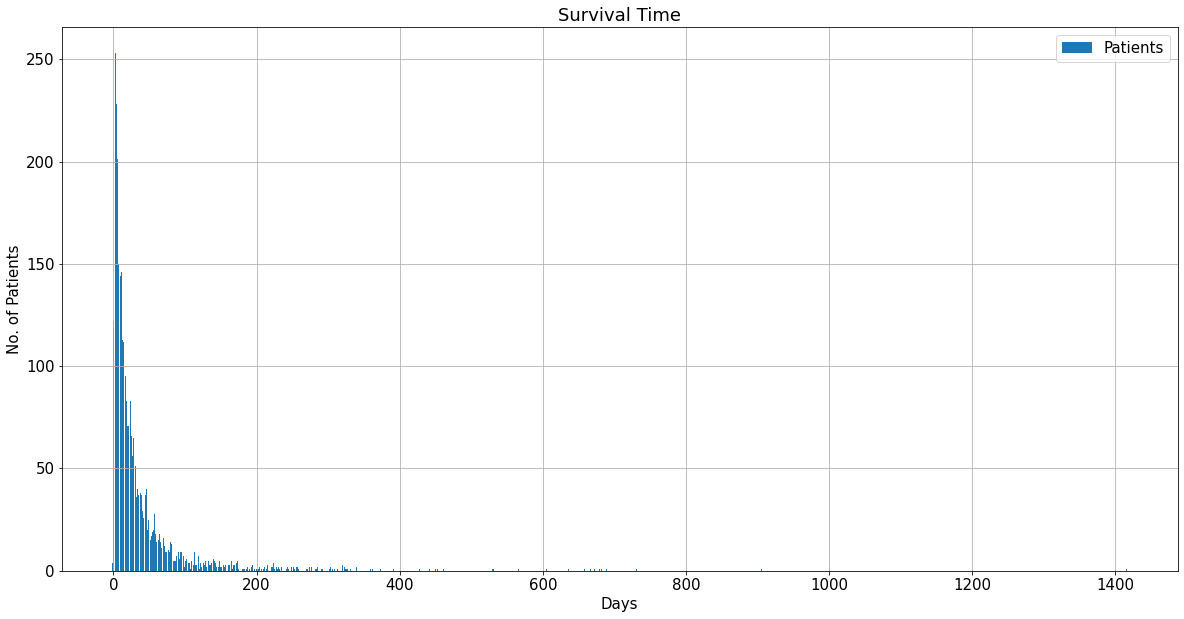

In [27]:
# get the survival time histogram for all patients
plt.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_referral['survival_time_days'].value_counts().index
survival = df_referral['survival_time_days'].value_counts(normalize=False)
fig, ax = plt.subplots()
bar1 = ax.bar(labels, survival, label='Patients')
ax.set_xlabel('Days')
ax.set_ylabel('No. of Patients')
ax.set_title('Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time.png", bbox_inches='tight')
plt.show()

In [28]:
df_referral.I_ICD.unique()

array(['1550 - Tumori maligni primitivi del fegato#2048',
       '28983 - Mielofibrosi#2615',
       '1629 - Tumori maligni del bronco o polmone -  non specificato#2069',
       '1739 - Altri tumori maligni della cute -  sede non specificata#2568',
       '001 - Cure Palliative#2005',
       '1579 - Tumori maligni del pancreas -  parte non specificata#2062',
       '1625 - Tumori maligni del lobo inferiore -  bronco o polmone#2067',
       '1619 - Tumori maligni della laringe, non specificata#2604=0',
       'V667 - Trattamento per cure palliative#2402=0',
       '1519 - Tumori maligni dello stomaco -  non specificato#2032',
       '1578 - Tumori maligni di altre sedi (specificate) del pancreas#2061',
       '1579 - Tumori maligni del pancreas, parte non specificata#2062=0',
       '1891 - Tumori maligni della pelvi renale#2124',
       '1570 - Tumori maligni della testa del pancreas#2056',
       '20410 - Leucemia linfoide, cronica, senza menzione di remissione#2274=0',
       '1571 -

In [29]:
df_referral.loc[df_referral['IDEHR'] == 1770]

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days
482,1770,2016-04-20 23:15:00,EHR,2016-04-15 11:00:00.400,7101 Sclerosi sistemica#2759=0,5.0


In [30]:
print(df_referral.shape)
df_referral = df_referral.drop([482])
print(df_referral.shape)

(5600, 6)
(5599, 6)


In [31]:
# clean up the diagnosis column
from googletrans import Translator
df_referral['Diagnosis'] = df_referral.I_ICD.str.findall('- (.+)#').to_frame()
df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0]) 
df_referral['Diag_Ref'] = df_referral.I_ICD.str.findall('(\d+) -').to_frame()
df_referral['Diag_Ref'] = df_referral['Diag_Ref'].apply(lambda x: x if isinstance(x, float) else int(x[0]))

In [32]:
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days,Diagnosis,Diag_Ref
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0,Tumori maligni primitivi del fegato,1550
2,1414,2015-10-05 11:50:00,EHR,2015-10-02 15:45:06.800,28983 - Mielofibrosi#2615,2.0,Mielofibrosi,28983
4,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0,Tumori maligni del bronco o polmone - non spe...,1629
5,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...,6.0,Altri tumori maligni della cute - sede non sp...,1739
6,2977,2015-10-06 06:00:00,AMB,2015-09-08 11:26:31.850,001 - Cure Palliative#2005,27.0,Cure Palliative,1


In [33]:
# ref_diag = df_referral[['Diagnosis', 'Diag_Ref']].drop_duplicates()
# ref_diag['Diagnosis'] = ref_diag['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# print(len(ref_diag.Diagnosis.unique()), len(ref_diag.Diag_Ref.unique()))
# ref_diag.head()

In [34]:
# save as csv file for grouping reference
# ref_diag.to_csv('./vidas_data/diagnosis_reference.csv')

In [35]:
# group together similar diag 
liver_biliary = [1550, 1977, 1560, 1569, 1568, 1561, 1552, 1551, 1562, 2308]
lung = [1629, 1625, 1624, 1623, 1970, 1628, 1630, 1639, 162, 1638, 2312, 1631, 1011, 1649, 1972, 1622, 5193]
skin = [1739, 1728, 1738, 172, 1723, 1737, 1729, 1760, 1722, 1726, 1725, 1727,  1724]
pancreas = [1579, 1578, 1570, 1571, 1572, 157, 1573]
head_neck = [1619, 1488, 1489, 1467, 1450, 1471, 1468, 1412, 1460, 1710, 1418, 1420, 1469, 1419, 1439, 1479, 1421, 1601, 1721, 1441, 1603, 1618, 1610, 1459, 1499, 1411, 1950, 1490, 1478, 1438, 1452, 1410, 1428, 1483]
genitourinary = [1891, 1890, 1892, 1899, 189, 1898, 1884, 1872, 23691, 1888, 1889, 188, 1883, 1882, 2337, 1881, 1880, 1052]
lymphoid_leukemia = [20410, 20890, 2048, 2041, 20480, 20400, 20420, 20290, 202, 1079, 2040]
breast = [1740, 1749, 1744, 1748, 1741, 174, 1742, 1759, 2330,  1746, 103, 1743, 1745]
brain_snc = [1919, 1918, 1917, 1910, 1911, 191, 1912, 1913, 1983, 1929, 1921, 1916, 1940, 1922, 1928]
gi_tract = [1539, 1540, 1532, 1541, 1536, 154, 153, 1548, 1543, 1531, 1535, 1975, 1542, 1533, 1534, 1976, 1520, 1000, 1516, 1511, 1519, 1513, 1518, 1509, 1504, 1514, 1502, 1501, 150, 1004, 1508, 1512, 1503, 1500, 1505, 1588, 1589, 1515, 1598, 1538, 1529, 1590, 1530, 1522, 1528, 1005, 1009]
thyroid = [193]
prostate = [185, 1046, 2334]
lymphoma = [20208, 20203, 20288, 20021, 20202, 20201, 20280, 20028, 20200, 20025, 20282, 20013, 20204, 20281,  20015, 20286, 20010, 20380, 20301, 1961, 1960, 2019, 20121, 2324, 2001, 20002, 20191, 1962, 20205, 20005, 20018, 20001, 20120, 1965, 2030, 20300, 2002, 20020]
cervical_ovarian = [1844, 1809, 1840, 2331, 1808, 1801, 1800, 1830, 1986, 1043, 1580, 179, 1828, 1820, 1838, 1839, 183, 1849]
myeloid_leukemia = [20510, 20520, 2051, 23875, 20600, 2089, 20610, 20580, 20690, 20590, 28983, 1985, 20500, 2059]
palliative_nonmalignant = [4011, 436, 5859, 5119, 5716, 7895, 2564, 4371, 4409, 7687, 768, 600, 1303, 7994, 5118, 3320, 4169, 2252, 2899, 5900, 9985, 42731, 99591, 463, 135, 4941, 28529, 5184, 40492, 4542, 33510, 7582, 27739, 8208, 7893, 51882, 3330, 44422, 34510, 4820, 2394, 5762, 33189, 4389, 41189, 40391, 27730, 1, 25001, 25000, 3310, 667, 51883, 4289, 2, 4379, 7054, 4281, 4280, 33520, 33119, 4149, 5715, 2900, 33182, 4912, 591, 2904, 29043, 586, 425, 6393, 49122, 34839, 5761, 7242, 99, 71500, 10, 4380, 2902, 29021, 3382, 51881, 515, 29040, 49121, 51884, 34591, 29020, 4918, 2859, 5849, 73300, 2800, 2941, 5712, 4299, 3485, 29411, 4019, 7854, 4414, 3352, 431, 28521, 28989, 4150, 7051, 3438, 4321, 578, 56089, 7824, 43811, 340, 73301, 49120, 261, 2903, 3312, 4160, 57140, 42, 41511, 430, 3449, 40493, 4168, 34830, 3314, 34590, 33524, 29041, 5609, 4254, 3321]
palliative_cancer_unspec = [1990, 199, 1958, 2399, 109, 1991, 19889, 2328]
sarcoma = [1718, 1409, 1431, 1707, 1510, 1719, 1640, 1717, 1716, 1713, 1953, 1733, 1951, 1709, 1715, 1735, 1702, 1874, 1736, 1704, 20530, 200, 1768, 2012, 20000]

In [36]:
df_referral['Diagnosis_Flag'] = np.NaN
df_referral.loc[df_referral['Diag_Ref'].isin(liver_biliary), 'Diagnosis'] = 'Liver-Biliary'
df_referral.loc[df_referral['Diag_Ref'].isin(liver_biliary), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lung), 'Diagnosis'] = 'Lung'
df_referral.loc[df_referral['Diag_Ref'].isin(lung), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(skin), 'Diagnosis'] = 'Skin'
df_referral.loc[df_referral['Diag_Ref'].isin(skin), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(pancreas), 'Diagnosis'] = 'Pancreas'
df_referral.loc[df_referral['Diag_Ref'].isin(pancreas), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(head_neck), 'Diagnosis'] = 'Head-Neck'
df_referral.loc[df_referral['Diag_Ref'].isin(head_neck), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(genitourinary), 'Diagnosis'] = 'Genitourinary'
df_referral.loc[df_referral['Diag_Ref'].isin(genitourinary), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoid_leukemia), 'Diagnosis'] = 'Lymphoid_Leukemia'
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoid_leukemia), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(breast), 'Diagnosis'] = 'Breast'
df_referral.loc[df_referral['Diag_Ref'].isin(breast), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(brain_snc), 'Diagnosis'] = 'Brain-Snc'
df_referral.loc[df_referral['Diag_Ref'].isin(brain_snc), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(gi_tract), 'Diagnosis'] = 'GI Tract'
df_referral.loc[df_referral['Diag_Ref'].isin(gi_tract), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(thyroid), 'Diagnosis'] = 'Thyroid'
df_referral.loc[df_referral['Diag_Ref'].isin(thyroid), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(prostate), 'Diagnosis'] = 'Prostate'
df_referral.loc[df_referral['Diag_Ref'].isin(prostate), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoma), 'Diagnosis'] = 'Lymphoma'
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoma), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(cervical_ovarian), 'Diagnosis'] = 'Cervical-Ovarian'
df_referral.loc[df_referral['Diag_Ref'].isin(cervical_ovarian), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(myeloid_leukemia), 'Diagnosis'] = 'Myeloid Leukemia'
df_referral.loc[df_referral['Diag_Ref'].isin(myeloid_leukemia), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(palliative_nonmalignant), 'Diagnosis'] = 'Palliative (Non-Malignant)'
df_referral.loc[df_referral['Diag_Ref'].isin(palliative_nonmalignant), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(palliative_cancer_unspec), 'Diagnosis'] = 'Palliative (Cancer-Unspecified)'
df_referral.loc[df_referral['Diag_Ref'].isin(palliative_cancer_unspec), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(sarcoma), 'Diagnosis'] = 'Sarcoma'
df_referral.loc[df_referral['Diag_Ref'].isin(sarcoma), 'Diagnosis_Flag'] = True

In [37]:
df_referral.Diagnosis_Flag.value_counts()

True    5563
Name: Diagnosis_Flag, dtype: int64

In [38]:
df_referral.shape

(5599, 9)

In [39]:
df_referral = df_referral[df_referral['Diagnosis_Flag'].notna()]

In [40]:
df_referral.shape

(5563, 9)

In [41]:
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days,Diagnosis,Diag_Ref,Diagnosis_Flag
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0,Liver-Biliary,1550,True
2,1414,2015-10-05 11:50:00,EHR,2015-10-02 15:45:06.800,28983 - Mielofibrosi#2615,2.0,Myeloid Leukemia,28983,True
4,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0,Lung,1629,True
5,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...,6.0,Skin,1739,True
6,2977,2015-10-06 06:00:00,AMB,2015-09-08 11:26:31.850,001 - Cure Palliative#2005,27.0,Palliative (Non-Malignant),1,True


In [42]:
df_referral.Diagnosis.value_counts()

Lung                               1097
GI Tract                            882
Palliative (Non-Malignant)          694
Pancreas                            528
Liver-Biliary                       395
Breast                              388
Genitourinary                       300
Cervical-Ovarian                    251
Brain-Snc                           233
Prostate                            197
Lymphoma                            145
Head-Neck                           115
Sarcoma                              91
Myeloid Leukemia                     79
Skin                                 74
Palliative (Cancer-Unspecified)      52
Lymphoid_Leukemia                    25
Thyroid                              17
Name: Diagnosis, dtype: int64

In [43]:
# median survival times
df_referral.groupby('Diagnosis').median()['survival_time_days'].sort_values(ascending=False)

Diagnosis
Brain-Snc                          22.0
Head-Neck                          20.0
GI Tract                           19.0
Breast                             18.0
Genitourinary                      17.0
Pancreas                           17.0
Cervical-Ovarian                   17.0
Sarcoma                            16.0
Prostate                           16.0
Lymphoma                           16.0
Lung                               16.0
Liver-Biliary                      14.0
Skin                               13.5
Lymphoid_Leukemia                  12.0
Palliative (Non-Malignant)         11.0
Palliative (Cancer-Unspecified)    10.0
Myeloid Leukemia                    7.0
Thyroid                             6.0
Name: survival_time_days, dtype: float64

In [44]:
# mean survival times 
df_referral.groupby('Diagnosis').mean()['survival_time_days'].sort_values(ascending=False)

Diagnosis
Lymphoid_Leukemia                  59.320000
Sarcoma                            45.747253
Prostate                           43.817259
Myeloid Leukemia                   43.443038
Breast                             41.814433
Cervical-Ovarian                   41.581673
Brain-Snc                          40.763948
Genitourinary                      39.686667
GI Tract                           37.626984
Head-Neck                          37.121739
Lung                               35.923428
Palliative (Non-Malignant)         33.210375
Liver-Biliary                      32.048101
Pancreas                           31.714015
Lymphoma                           27.386207
Skin                               24.824324
Thyroid                            24.058824
Palliative (Cancer-Unspecified)    21.326923
Name: survival_time_days, dtype: float64

In [45]:
# get the survival time histogram for patients in each diagnosis
df_survival = df_referral[['Diagnosis', 'survival_time_days']].groupby(by=['Diagnosis']).mean()
df_survival_stddev = df_referral[['Diagnosis', 'survival_time_days']].groupby(by=['Diagnosis']).std(ddof=0)

In [46]:
df_survival

,survival_time_days
Diagnosis,
Brain-Snc,40.763948
Breast,41.814433
Cervical-Ovarian,41.581673
GI Tract,37.626984
Genitourinary,39.686667
Head-Neck,37.121739
Liver-Biliary,32.048101
Lung,35.923428
Lymphoid_Leukemia,59.320000


In [47]:
df_survival_stddev = df_survival_stddev.rename(columns={"survival_time_days": "survival_stddev"})
df_surv = pd.merge(df_survival, df_survival_stddev, on='Diagnosis').reset_index().sort_values(by='survival_time_days', ascending=False).reset_index(drop=True)
df_surv

,Diagnosis,survival_time_days,survival_stddev
0,Lymphoid_Leukemia,59.320000,96.493614
1,Sarcoma,45.747253,72.573054
2,Prostate,43.817259,71.664809
3,Myeloid Leukemia,43.443038,105.702801
4,Breast,41.814433,78.327666
5,Cervical-Ovarian,41.581673,110.452187
6,Brain-Snc,40.763948,56.944443
7,Genitourinary,39.686667,65.222709
8,GI Tract,37.626984,65.979144
9,Head-Neck,37.121739,70.730493


In [48]:
# from googletrans import Translator
# df_surv['Diagnosis'] = df_surv.I_ICD.str.findall('(.+)#').to_frame()
# df_surv['Diagnosis'] = df_surv['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_surv['I_ICD'] = df_surv['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_surv = df_surv.drop(columns = ['Diagnosis']).sort_values(by='survival_time_days', ascending=False)
# df_surv

<Figure size 1440x1296 with 0 Axes>

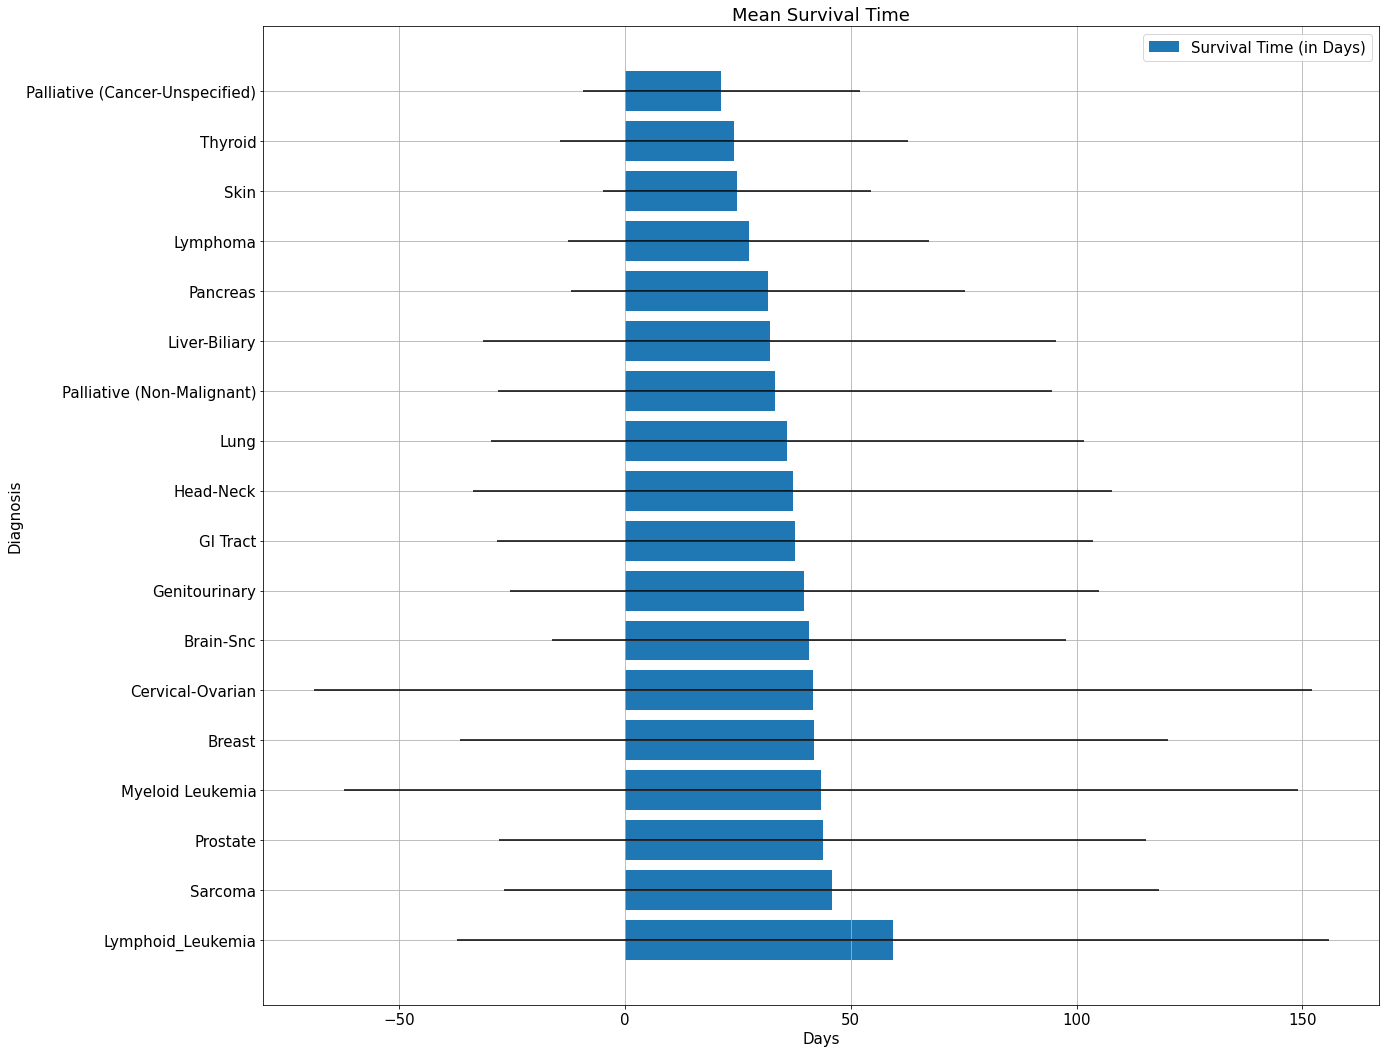

In [49]:
plt.rcParams['figure.figsize'] = [20, 18]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_surv['Diagnosis']
survival = df_surv['survival_time_days']
errors = df_surv['survival_stddev']
fig, ax = plt.subplots()
bar1 = ax.barh(labels, survival, label='Survival Time (in Days)', xerr=errors)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Mean Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_diagnosis.png", bbox_inches='tight')
plt.show()

<AxesSubplot:title={'center':'Survival Time'}, ylabel='Days'>

<Figure size 720x720 with 0 Axes>

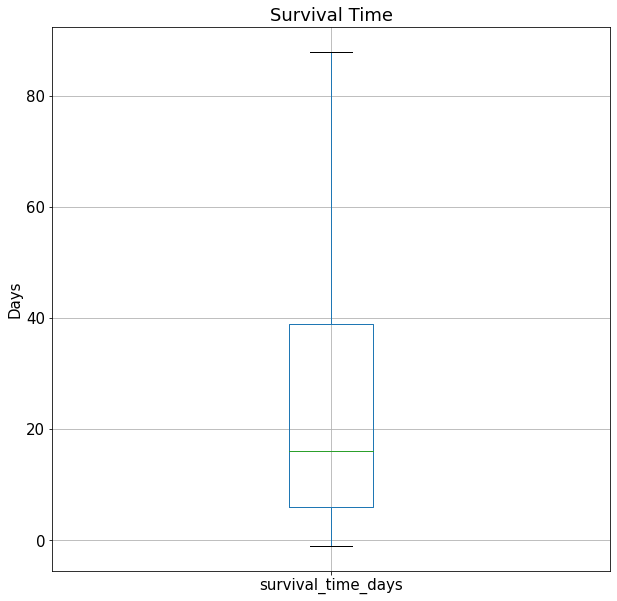

In [50]:
# generate a box and whisker plot
plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
fig, ax = plt.subplots()
ax.set_ylabel('Days')
ax.set_title('Survival Time')
df_referral.boxplot(column=['survival_time_days'], showfliers=False)

<AxesSubplot:title={'center':'Survival Time'}, ylabel='Days'>

<Figure size 720x720 with 0 Axes>

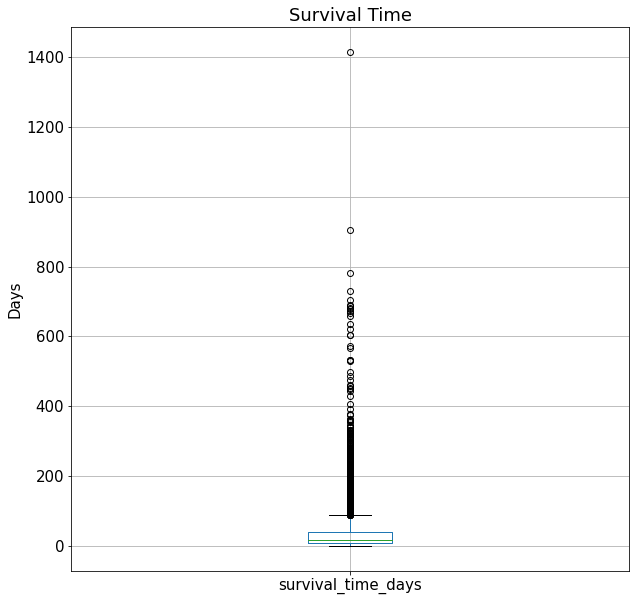

In [51]:
# boxplot with outliers
plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
fig, ax = plt.subplots()
ax.set_ylabel('Days')
ax.set_title('Survival Time')
df_referral.boxplot(column=['survival_time_days'])

<Figure size 360x360 with 0 Axes>

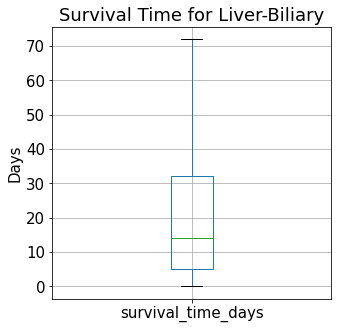

<Figure size 360x360 with 0 Axes>

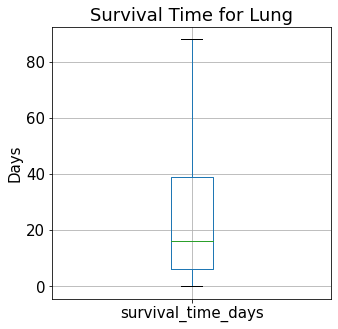

<Figure size 360x360 with 0 Axes>

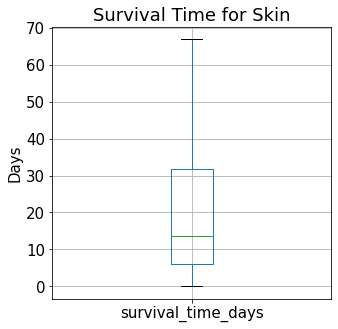

<Figure size 360x360 with 0 Axes>

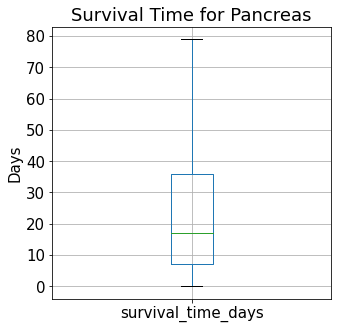

<Figure size 360x360 with 0 Axes>

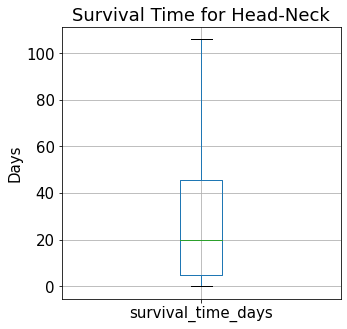

<Figure size 360x360 with 0 Axes>

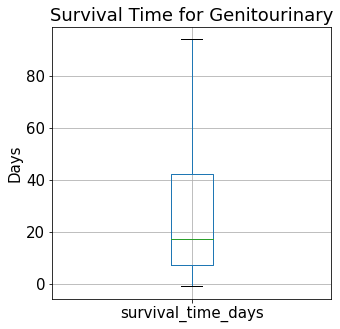

<Figure size 360x360 with 0 Axes>

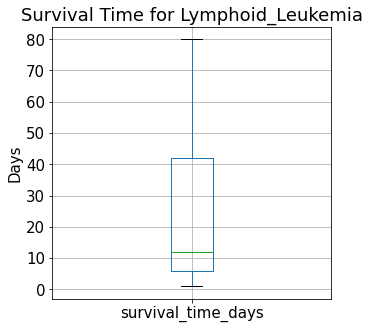

<Figure size 360x360 with 0 Axes>

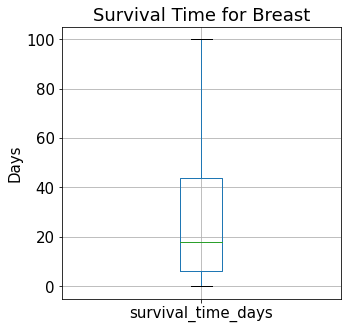

<Figure size 360x360 with 0 Axes>

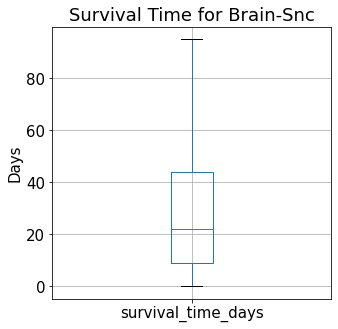

<Figure size 360x360 with 0 Axes>

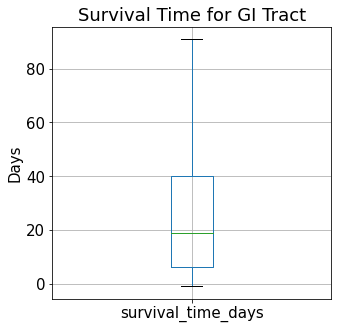

<Figure size 360x360 with 0 Axes>

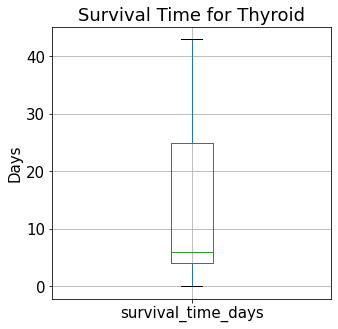

<Figure size 360x360 with 0 Axes>

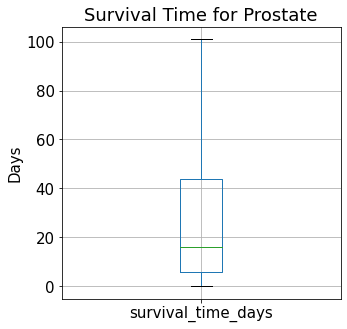

<Figure size 360x360 with 0 Axes>

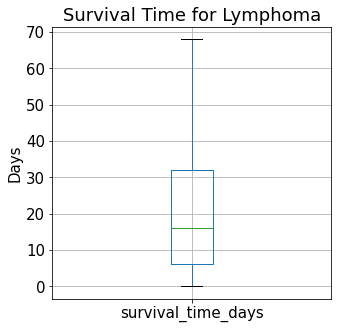

<Figure size 360x360 with 0 Axes>

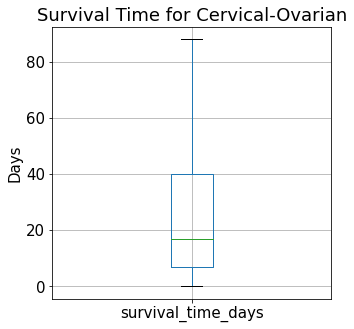

<Figure size 360x360 with 0 Axes>

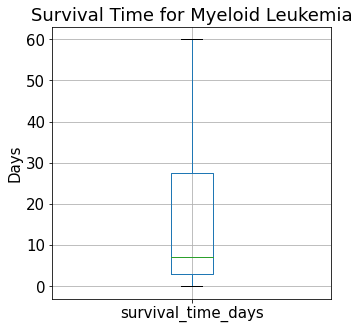

<Figure size 360x360 with 0 Axes>

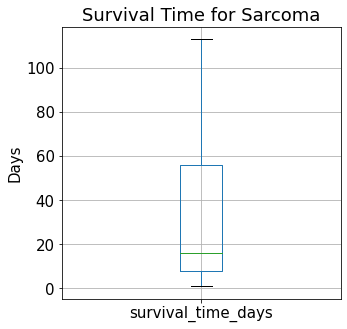

<Figure size 360x360 with 0 Axes>

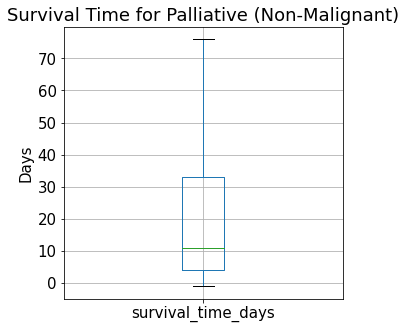

<Figure size 360x360 with 0 Axes>

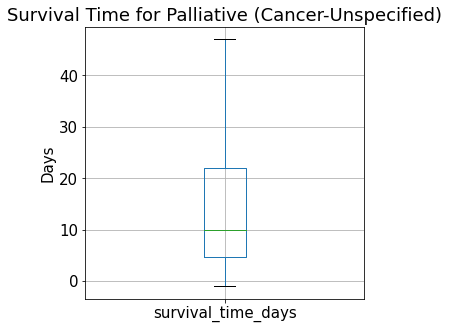

In [52]:
# boxplots for individual diagnosis
cancers = ['Liver-Biliary', 'Lung', 'Skin', 'Pancreas', 'Head-Neck', 'Genitourinary',
       'Lymphoid_Leukemia', 'Breast', 'Brain-Snc', 'GI Tract', 'Thyroid', 'Prostate',
       'Lymphoma', 'Cervical-Ovarian', 'Myeloid Leukemia', 'Sarcoma', 'Palliative (Non-Malignant)', 'Palliative (Cancer-Unspecified)']

for cancer in cancers:
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams.update({'figure.max_open_warning': 0})
    df_temp = df_referral[df_referral['Diagnosis'] == cancer]
    plt.figure()
    fig, ax = plt.subplots()
    ax.set_ylabel('Days')
    ax.set_title('Survival Time for ' + cancer)
    df_temp.boxplot(column=['survival_time_days'], showfliers=False)

<Figure size 1440x1296 with 0 Axes>

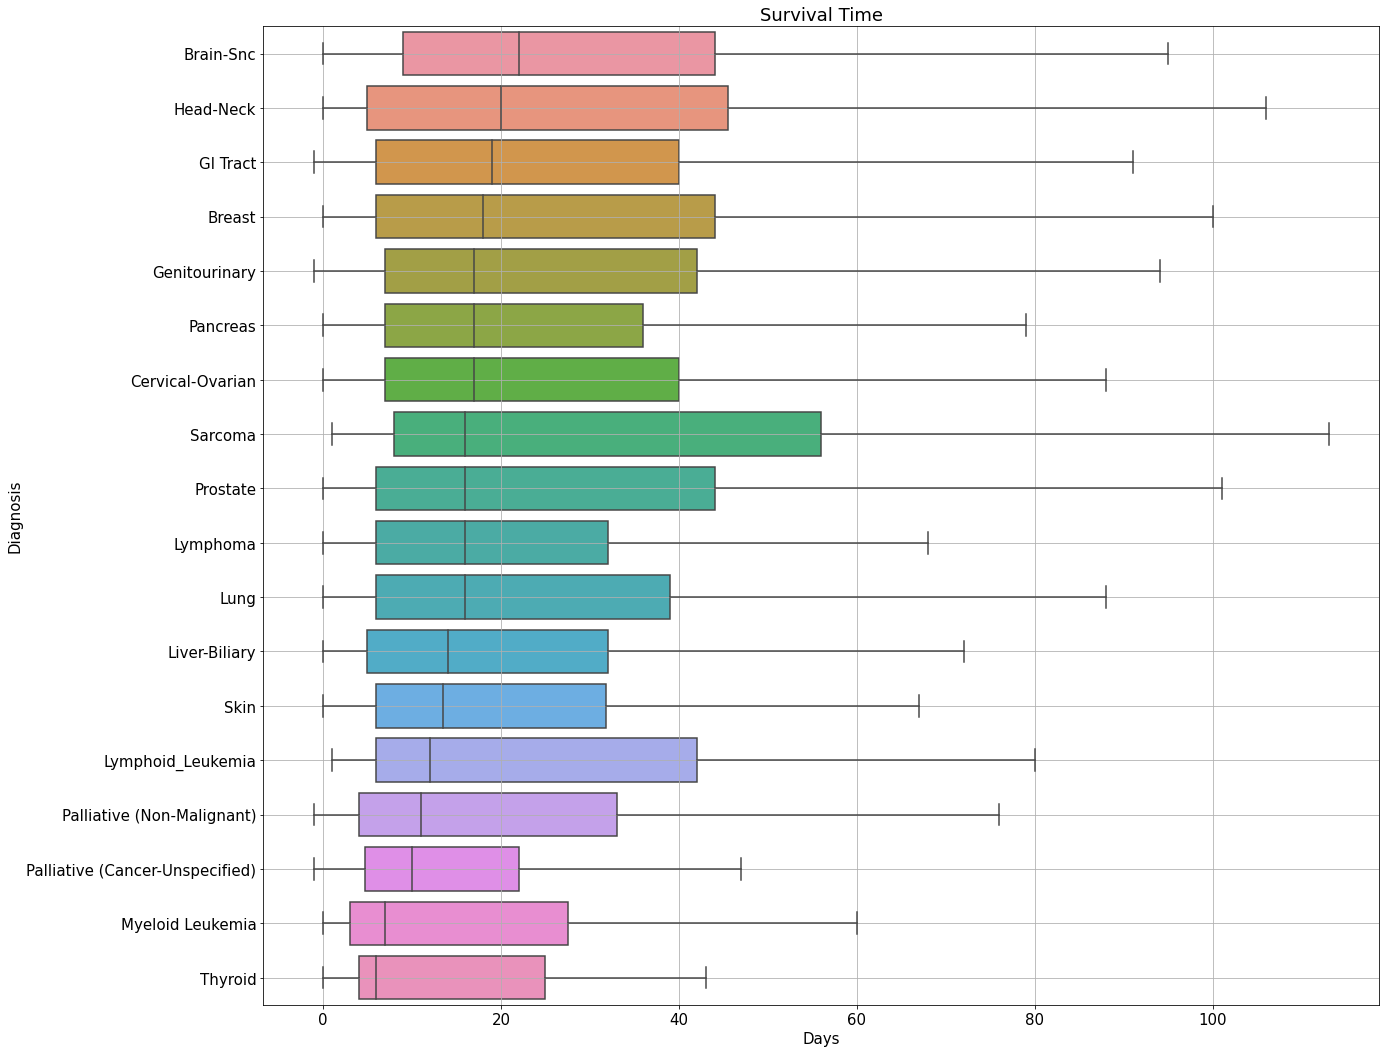

In [53]:
# boxplots for each diagnosis
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 18]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
diag_order = df_referral.groupby(by=['Diagnosis'])['survival_time_days'].median().sort_values(ascending=False).index
ax = sns.boxplot(x='survival_time_days', y='Diagnosis', data=df_referral, order=diag_order, showfliers=False)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Survival Time')
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_box_plot_diagnosis.png", bbox_inches='tight')
plt.show()

In [54]:
df_referral.groupby(by=['Diagnosis'])['survival_time_days'].median().sort_values(ascending=False).index

Index(['Brain-Snc', 'Head-Neck', 'GI Tract', 'Breast', 'Genitourinary',
       'Pancreas', 'Cervical-Ovarian', 'Sarcoma', 'Prostate', 'Lymphoma',
       'Lung', 'Liver-Biliary', 'Skin', 'Lymphoid_Leukemia',
       'Palliative (Non-Malignant)', 'Palliative (Cancer-Unspecified)',
       'Myeloid Leukemia', 'Thyroid'],
      dtype='object', name='Diagnosis')

<Figure size 1440x1296 with 0 Axes>

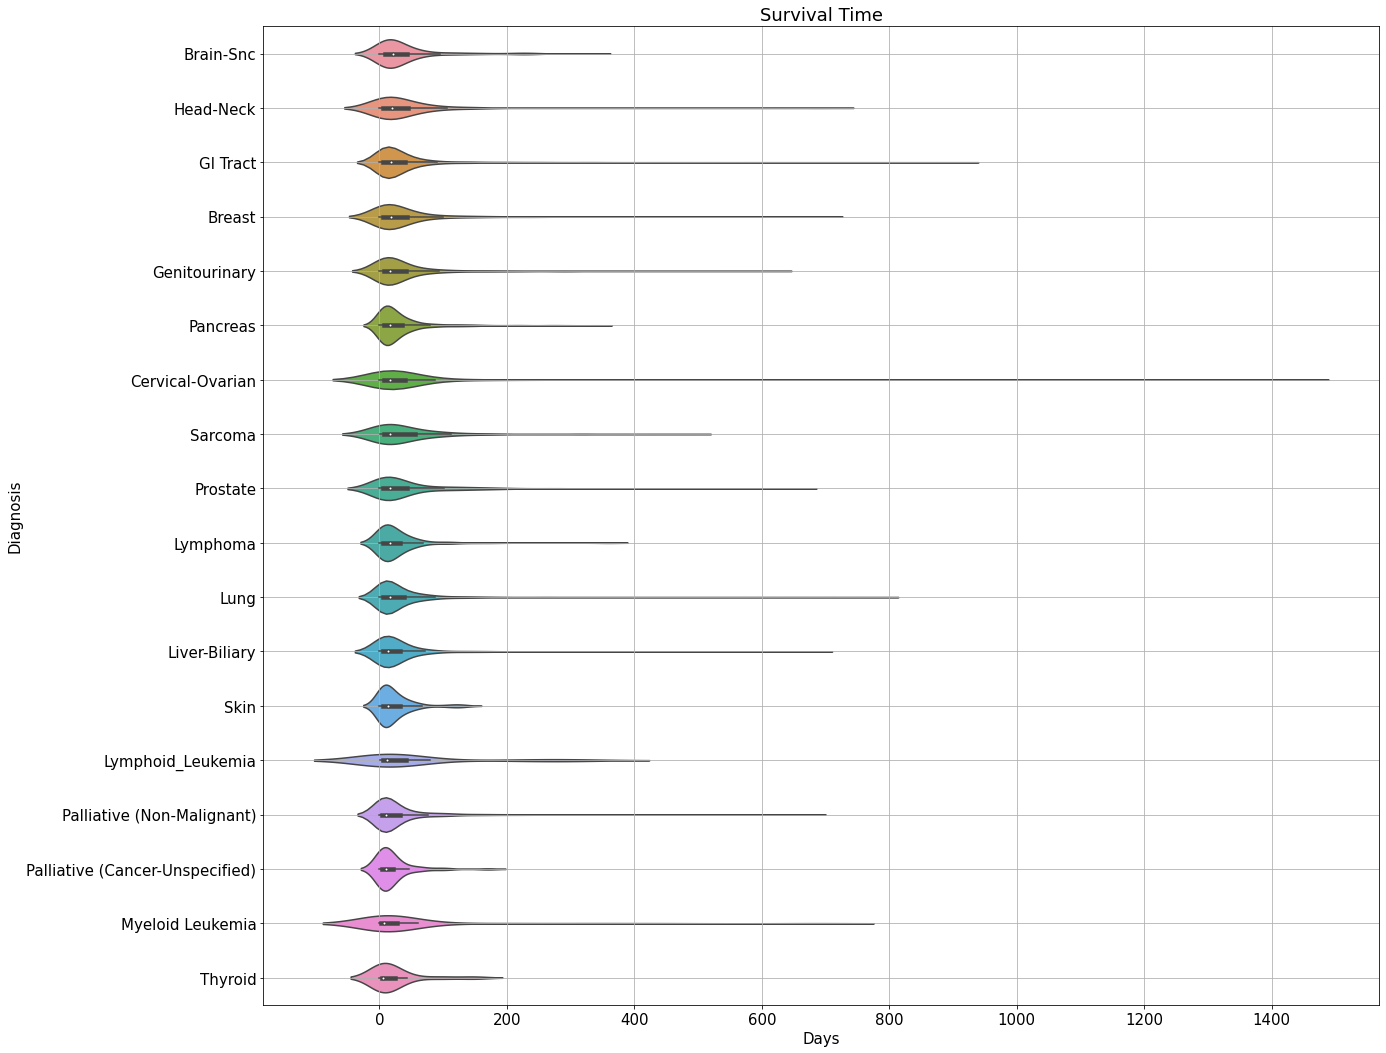

In [55]:
# Violin Plots
plt.rcParams['figure.figsize'] = [20, 18]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
diag_order = df_referral.groupby(by=['Diagnosis'])['survival_time_days'].median().sort_values(ascending=False).index
ax = sns.violinplot(x='survival_time_days', y='Diagnosis', data=df_referral, order=diag_order, showfliers=False)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Survival Time')
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_violin_plot_diagnosis.png", bbox_inches='tight')
plt.show()

<Figure size 360x360 with 0 Axes>

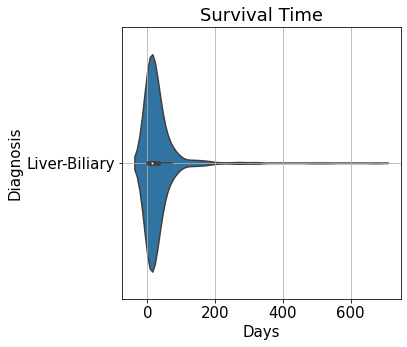

<Figure size 360x360 with 0 Axes>

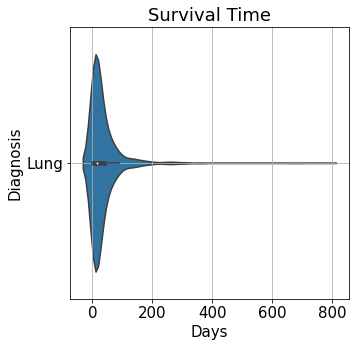

<Figure size 360x360 with 0 Axes>

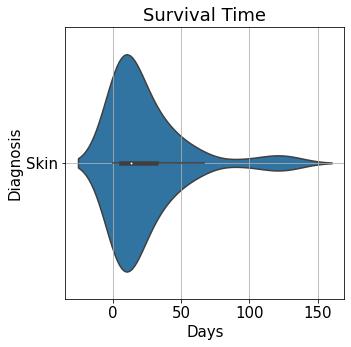

<Figure size 360x360 with 0 Axes>

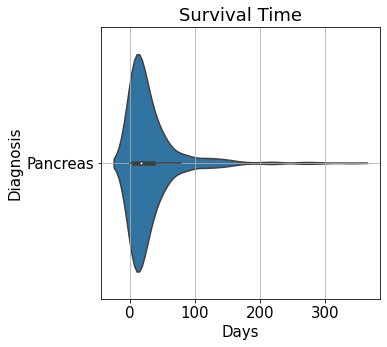

<Figure size 360x360 with 0 Axes>

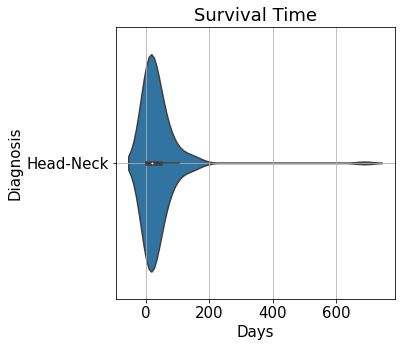

<Figure size 360x360 with 0 Axes>

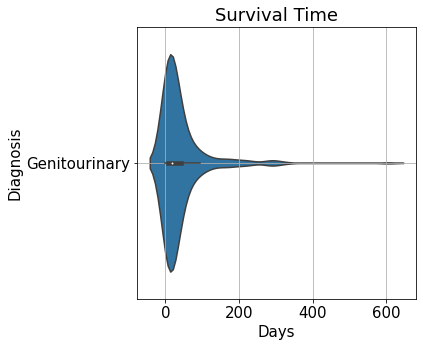

<Figure size 360x360 with 0 Axes>

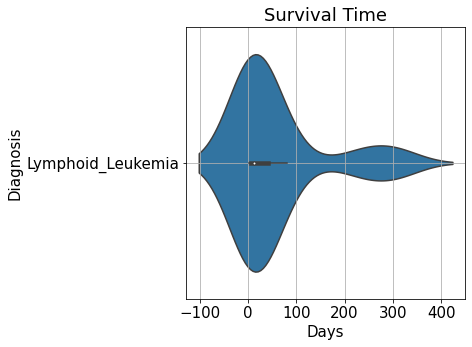

<Figure size 360x360 with 0 Axes>

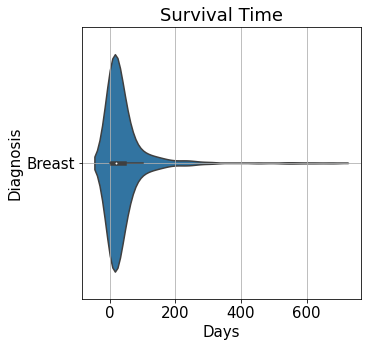

<Figure size 360x360 with 0 Axes>

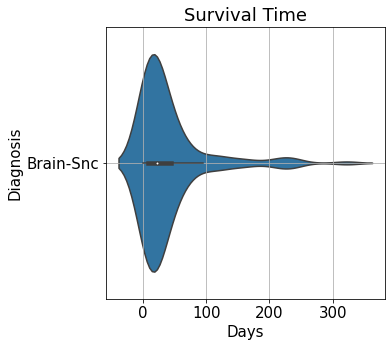

<Figure size 360x360 with 0 Axes>

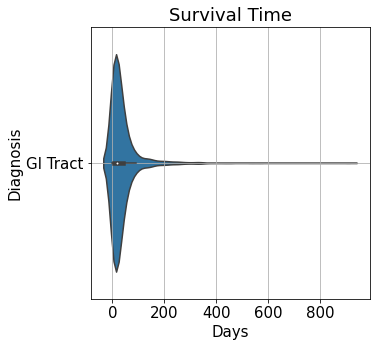

<Figure size 360x360 with 0 Axes>

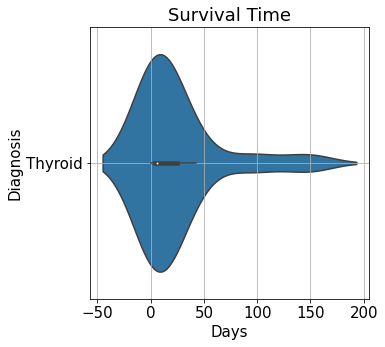

<Figure size 360x360 with 0 Axes>

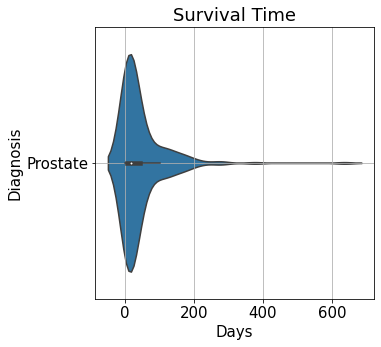

<Figure size 360x360 with 0 Axes>

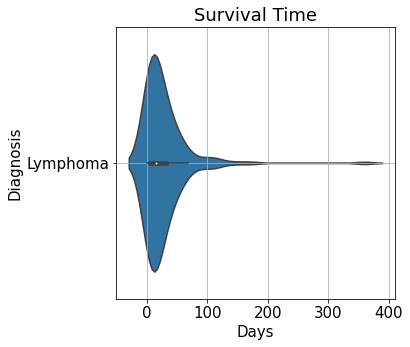

<Figure size 360x360 with 0 Axes>

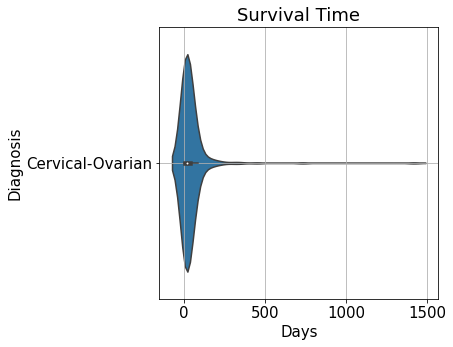

<Figure size 360x360 with 0 Axes>

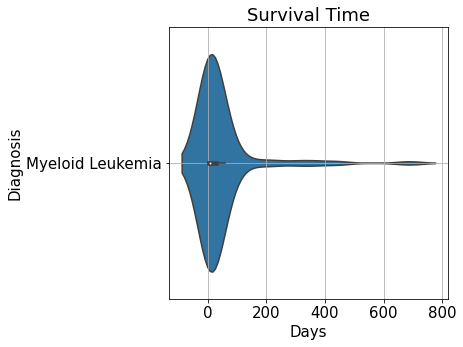

<Figure size 360x360 with 0 Axes>

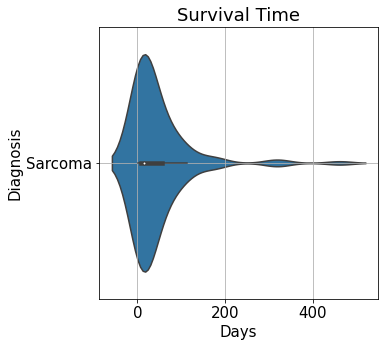

<Figure size 360x360 with 0 Axes>

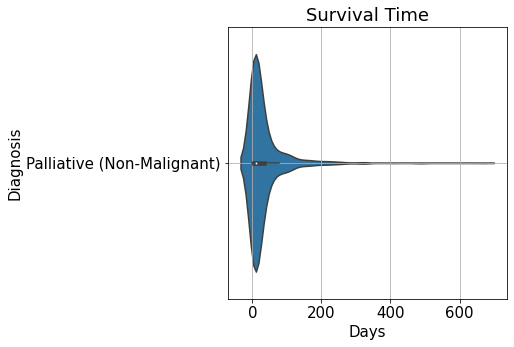

<Figure size 360x360 with 0 Axes>

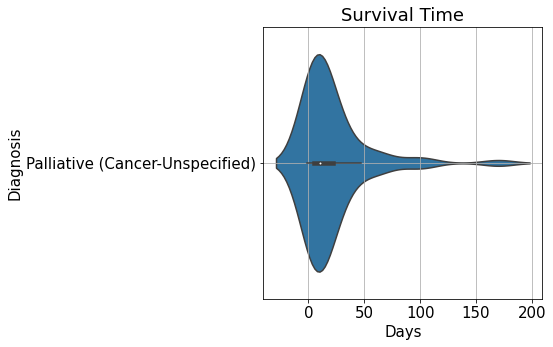

In [56]:
# Violin plot for individual diagnosis
cancers = ['Liver-Biliary', 'Lung', 'Skin', 'Pancreas', 'Head-Neck', 'Genitourinary',
       'Lymphoid_Leukemia', 'Breast', 'Brain-Snc', 'GI Tract', 'Thyroid', 'Prostate',
       'Lymphoma', 'Cervical-Ovarian', 'Myeloid Leukemia', 'Sarcoma', 'Palliative (Non-Malignant)', 'Palliative (Cancer-Unspecified)']

for cancer in cancers:
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams.update({'figure.max_open_warning': 0})
    df_temp = df_referral[df_referral['Diagnosis'] == cancer]
    plt.figure()
    fig, ax = plt.subplots()
    ax = sns.violinplot(x='survival_time_days', y='Diagnosis', data=df_temp)
    ax.set_xlabel('Days')
    ax.set_ylabel('Diagnosis')
    ax.set_title('Survival Time')
    plt.grid()
    plt.show()

<Figure size 1440x648 with 0 Axes>

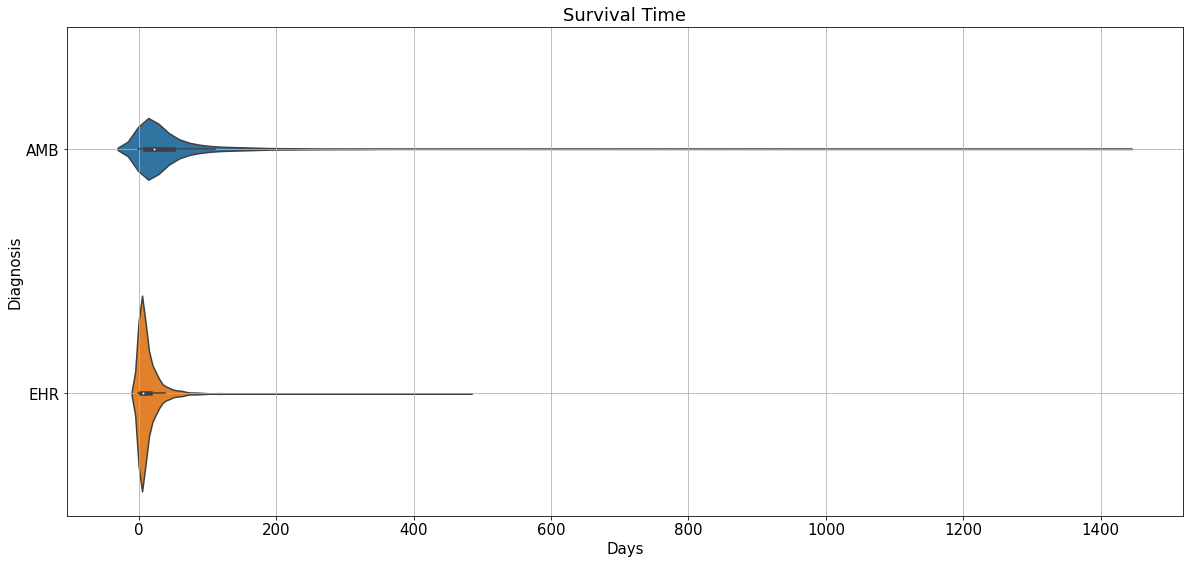

In [57]:
# AMB vs EHR survival time
plt.rcParams['figure.figsize'] = [20, 9]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
diag_order = df_referral.groupby(by=['EHRType'])['survival_time_days'].median().sort_values(ascending=False).index
ax = sns.violinplot(x='survival_time_days', y='EHRType', data=df_referral, order=diag_order)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Survival Time')
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_violin_plot_EHRType.png")
plt.show()

In [58]:
df_referral = df_referral.rename(columns={'Data': 'EOH', 'TimeStamp_Insert': 'SOH'})
df_referral = df_referral.drop(columns=['I_ICD', 'Diagnosis_Flag'])
df_referral.to_csv('./vidas_data/survival_time.csv', index=False)